In [1]:
import pandas as pd
from pylab import *
# from tb_DataReader import EventFeaturesReader
# from tb_PulseAmpFitter import PulseAmpFitter
# from tb_RunManager import getRunMngs
# from tb_HVAnalyzer import HVAnalyzer
# from IPython.display import clear_output

%matplotlib inline


# 1. Fit And Plot All Runs

In [2]:
# dataDir = "../data/eventFeatures"
# runMngs = getRunMngs()
# ana = HVAnalyzer(dataDir,runMngs)
# runMngs = ana.fitAndPlotRuns(makePlots=False, plotDir="../plots/pulseAmpFit_adjust", adjustFitRange=True)
# #runMngs = ana.fitAndPlotRuns(makePlots=True, plotDir="../plots/pulseAmpFit", adjustFitRange=False)

# #ana.plotRuns_Hist2D()

In [3]:
# runMng = runMngs[0]
# df = pd.DataFrame()
# for v in ["u",
#           "argmax_VME_CH2","mu_VME_CH2","mu_err_VME_CH2",
#           "argmax_VME_CH3","mu_VME_CH3","mu_err_VME_CH3",
#           "argmax_ubcm_CH2","mu_ubcm_CH2","mu_err_ubcm_CH2",
#           "argmax_ubcm_CH3","mu_ubcm_CH3","mu_err_ubcm_CH3"]:
#     df[v] = runMng[v]
# df.to_pickle("../data/HVScanAnalysis/result_of_fit_sensor1.pkl")

# runMng = runMngs[1]
# df = pd.DataFrame()
# for v in ["u",
#           "argmax_VME_CH0","mu_VME_CH0","mu_err_VME_CH0",
#           "argmax_VME_CH1","mu_VME_CH1","mu_err_VME_CH1",
#           "argmax_ubcm_CH0","mu_ubcm_CH0","mu_err_ubcm_CH0",
#           "argmax_ubcm_CH1","mu_ubcm_CH1","mu_err_ubcm_CH1"]:
#     df[v] = runMng[v]
# df.to_pickle("../data/HVScanAnalysis/result_of_fit_sensor2.pkl")

# 2. Plot Volage Scan

In [4]:
dataDir = "data/"
plotConfig = {
    "ubcm_CH2":("C0",'^-'), "ubcm_CH3":("C0",'o--' ), 
    "VME_CH2" :("C1",'^-'), "VME_CH3" :("C1",'o--' ),
    "ubcm_CH0":("C2",'^-'), "ubcm_CH1":("C2",'o--' ),
    "VME_CH0" :("C3",'^-'), "VME_CH1" :("C3",'o--' )}


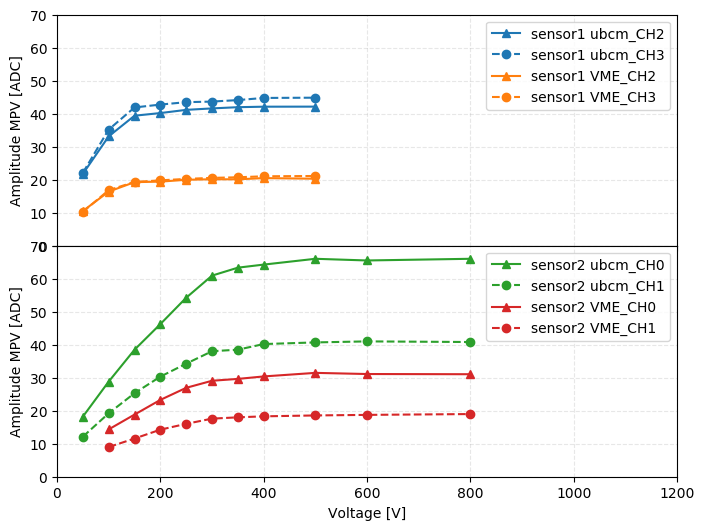

In [5]:
f, (ax1, ax2) = plt.subplots(2,1, sharey=True, facecolor='w',figsize=(8,6))
plt.subplots_adjust(hspace=0)

sensor,vPrefix = "sensor1","argmax_"
df = pd.read_pickle("../data/HVScanAnalysis/result_of_fit_{}.pkl".format(sensor))
for v in ["ubcm_CH2","ubcm_CH3","VME_CH2","VME_CH3"]:
    ax1.errorbar(df["u"], df[vPrefix+v], fmt=plotConfig[v][1],color=plotConfig[v][0],label=sensor + " " + v)
ax1.set_xlim(0,1200)
ax1.set_ylim(0,70)
ax1.legend(loc="upper right")
ax1.grid(linestyle='--',alpha=0.3)
ax1.set_ylabel("Amplitude MPV [ADC]")
ax1.set_xticklabels([])


sensor,vPrefix = "sensor2","argmax_"
df = pd.read_pickle("../data/HVScanAnalysis/result_of_fit_{}.pkl".format(sensor))
for v in ["ubcm_CH0","ubcm_CH1","VME_CH0","VME_CH1"]:
    ax2.errorbar(df["u"], df[vPrefix+v], fmt=plotConfig[v][1],color=plotConfig[v][0],label=sensor + " " + v)
ax2.set_xlim(0,1200)
ax2.set_ylim(0,70)
ax2.legend(loc="upper right")
ax2.grid(linestyle='--',alpha=0.3)
ax2.set_xlabel("Voltage [V]")
ax2.set_ylabel("Amplitude MPV [ADC]")

#plt.savefig("../plots/voltageScan_MPV.png",dpi=300)
plt.savefig("../plots/voltageScan_MPV_adjust.png",dpi=300)

# Include Calibration

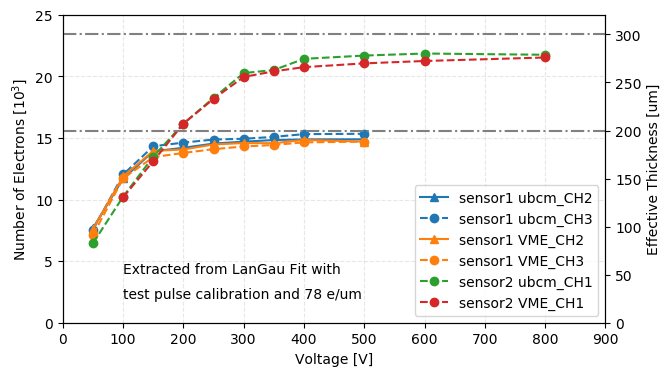

In [7]:
calibration = pd.read_pickle("../data/calibration.pkl")
eleDensity = 78

# make plot
fig, ax1 = plt.subplots(facecolor='w',figsize=(7,4))
sensor,vPrefix = "sensor1","argmax_"
df = pd.read_pickle("../data/HVScanAnalysis/result_of_fit_{}.pkl".format(sensor))
for v in ["ubcm_CH2","ubcm_CH3","VME_CH2","VME_CH3"]:
    k = abs(calibration[v][0]/1000)
    ax1.plot(df["u"], k*df[vPrefix+v], plotConfig[v][1], color=plotConfig[v][0], label=sensor + " " + v)

sensor,vPrefix = "sensor2","argmax_"
df = pd.read_pickle("../data/HVScanAnalysis/result_of_fit_{}.pkl".format(sensor))
for v in ["ubcm_CH1","VME_CH1"]:
    k = abs(calibration[v][0]/1000)
    ax1.plot(df["u"], k*df[vPrefix+v], plotConfig[v][1], color=plotConfig[v][0], label=sensor + " " + v)

# plot setting
ax1.set_xlim(0,900)
ax1.set_ylim(0,25)
ax1.legend(loc="lower right")
ax1.grid(linestyle='--',alpha=0.3)
ax1.set_ylabel(r"Number of Electrons [$10^3$]")
ax1.set_xlabel("Voltage [V]")
ax1.text(100,4,"Extracted from LanGau Fit with")
ax1.text(100,2,"test pulse calibration and {} e/um".format(eleDensity))
ax2 = ax1.twinx()
ax2.set_ylim(0,25000/eleDensity)
ax2.set_ylabel("Effective Thickness [um]")
ax2.axhline(300,linestyle='-.',color='grey')
ax2.axhline(200,linestyle='-.',color='grey')
plt.savefig("../plots/voltageScan_thickness_adjust.png",dpi=300)